### Assignment

## StoryTelling using Statistics and Visualization

**Do the storytelling on this dataset:**

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/

## 🏠 Housing Price Analysis | Data Cleaning & Enhanced EDA

### Step 1 – Load Data & Quick Preview
In this step, we will:
- Import necessary libraries
- Load the dataset into a Pandas DataFrame
- Check its shape (rows × columns)
- Preview the first few rows to understand the structure

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Housing.csv")

# Shape & preview
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

Dataset contains 545 rows and 13 columns.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Step 2 – Data Cleaning

Here, we will:
1. Check for missing values
2. Remove duplicate rows (if any)
3. Ensure correct data types
4. Identify potential outliers for later treatment

In [2]:
# 1. Missing values check
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [3]:
# 2. Remove duplicates
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicates_count} duplicate rows.")
else:
    print("No duplicates found.")

No duplicates found.


In [4]:
# 3. Data types
print("\nData Types:\n", df.dtypes)


Data Types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [5]:
# 4. Quick outlier check (numeric columns only)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Step 3 – Descriptive Statistics & Initial Insights

Now that the dataset is clean, we will:
- Get statistical summaries for numerical columns
- Check the distribution of categorical features
- Explore central tendency (mean, median, mode)
- Check spread and shape (standard deviation, min, max, quartiles)
- Prepare notes for insights

In [6]:
# Statistical summary for numeric columns
numeric_summary = df.describe().T

In [7]:
numeric_summary["missing"] = df[numeric_summary.index].isnull().sum()

In [8]:
numeric_summary["skewness"] = df[numeric_summary.index].skew()

In [9]:
numeric_summary["kurtosis"] = df[numeric_summary.index].kurt()

In [10]:
numeric_summary

,count,mean,std,min,25%,50%,75%,max,missing,skewness,kurtosis
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0,0,1.212239,1.960130
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0,0,1.321188,2.751480
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0,0,0.495684,0.728323
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0,0,1.589264,2.164856
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0,0,1.082088,0.679404
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0,0,0.842062,-0.573063


### 📝 Observations:
- **Mean & Median**: Helps identify if the data is symmetric or skewed.
- **Skewness**:
  - Positive skew (>0): Long tail to the right (e.g., Price might be right-skewed due to luxury properties).
  - Negative skew (<0): Long tail to the left.
- **Kurtosis**:
  - >3: Leptokurtic (peaked, heavy tails)
  - <3: Platykurtic (flat, light tails)

### ✨My initial observations

### **1. Price**
- **Right-Skewed (1.21)**: The mean (₹4.77M) is significantly higher than the median (₹4.34M), suggesting a few high-value outliers (luxury homes) pulling the average up.
- **High Kurtosis (1.96)**: The distribution has heavier tails than a normal distribution but is not extremely peaked.
- **Max (₹13.3M) is far above the 75th percentile (₹5.74M)**, confirming the presence of very expensive properties.

### **2. Area**
- **Right-Skewed (1.32)**: The mean area (5,151 sq. ft.) is larger than the median (4,600 sq. ft.), indicating some very large properties.
- **High Kurtosis (2.75)**: Suggests a sharper peak and fatter tails than a normal distribution.
- **Max (16,200 sq. ft.) is extreme** compared to the 75th percentile (6,360 sq. ft.).

### **3. Bedrooms**
- **Mild Right-Skew (0.50)**: Most houses have 2-3 bedrooms, but some have up to 6.
- **Mean (~3) ≈ Median (3)**, so the skew is not extreme.
- **Low Kurtosis (0.73)**: Flatter distribution than a normal curve.

### **4. Bathrooms**
- **Strong Right-Skew (1.59)**: Most homes have 1 bathroom (median=1), but some have up to 4, pulling the mean (1.29) higher.
- **High Kurtosis (2.16)**: More peaked with heavier tails than normal.

### **5. Stories (Floors)**
- **Right-Skew (1.08)**: Most houses are 1-2 stories, but some go up to 4.
- **Moderate Kurtosis (0.68)**: Slightly flatter than a normal distribution.

### **6. Parking**
- **Right-Skew (0.84)**: Most houses have 0 or 1 parking spot, but some have up to 3.
- **Negative Kurtosis (-0.57)**: Very flat distribution (platykurtic), meaning fewer extreme values than a normal distribution.

### **General Insights**:
- **Price and Area** are **highly skewed**, likely due to luxury properties with very high values and large sizes.
- **Most homes** are **modest**:  
  - 2-3 bedrooms, 1 bathroom, 1-2 stories, and limited parking (0-1 spots).  
- **Potential Outliers**:  
  - A few homes are extremely expensive (up to ₹13.3M) or very large (16,200 sq. ft.).  
  - These may need investigation (e.g., are they genuine luxury properties or data errors?). 

### categorical feature analysis:

In [11]:
# Categorical value counts
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True) * 100)  # percentage distribution


Column: mainroad
mainroad
yes    85.87156
no     14.12844
Name: proportion, dtype: float64

Column: guestroom
guestroom
no     82.201835
yes    17.798165
Name: proportion, dtype: float64

Column: basement
basement
no     64.954128
yes    35.045872
Name: proportion, dtype: float64

Column: hotwaterheating
hotwaterheating
no     95.412844
yes     4.587156
Name: proportion, dtype: float64

Column: airconditioning
airconditioning
no     68.440367
yes    31.559633
Name: proportion, dtype: float64

Column: prefarea
prefarea
no     76.513761
yes    23.486239
Name: proportion, dtype: float64

Column: furnishingstatus
furnishingstatus
semi-furnished    41.651376
unfurnished       32.660550
furnished         25.688073
Name: proportion, dtype: float64


### Step 4 – Enhanced EDA Visualizations

We will:
- Explore the distribution of numeric variables
- Detect outliers using boxplots
- Compare target variable (Price) against key features
- Visualize categorical distributions
- Check correlations for numeric features

### Import libraries:

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

### Histograms (distribution plots):

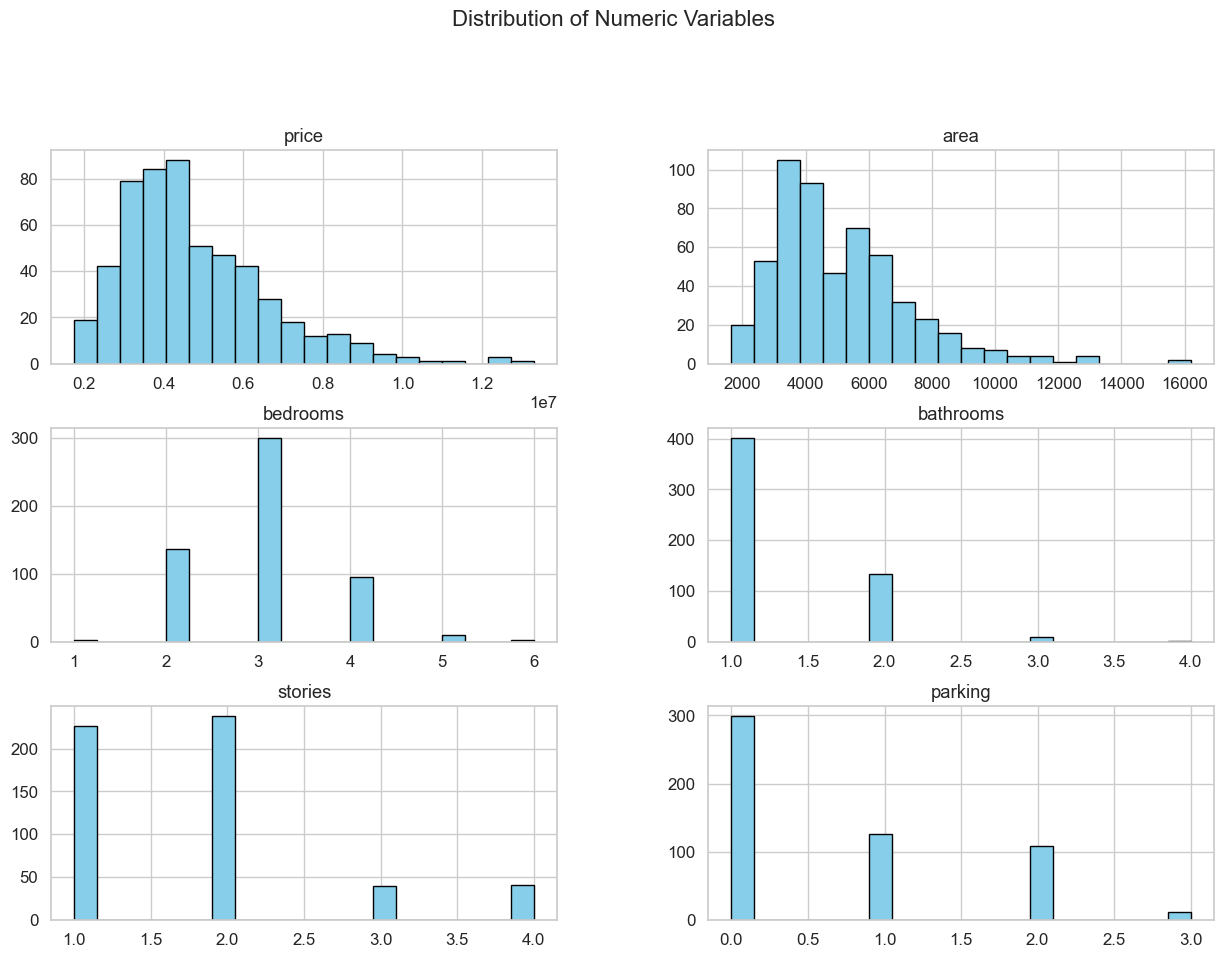

In [13]:
# Histogram for all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numeric Variables", fontsize=16, y=1.02)
plt.show()

### Boxplots for outliers:

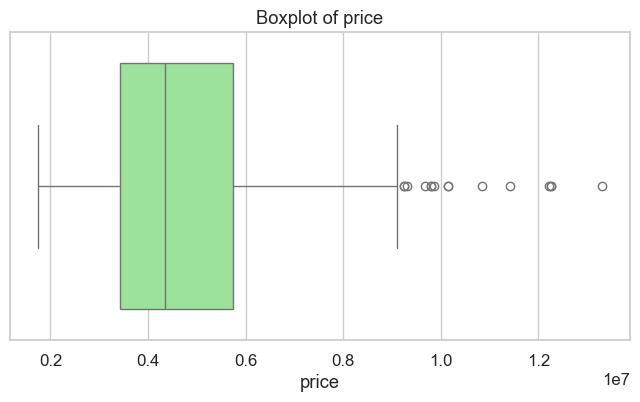

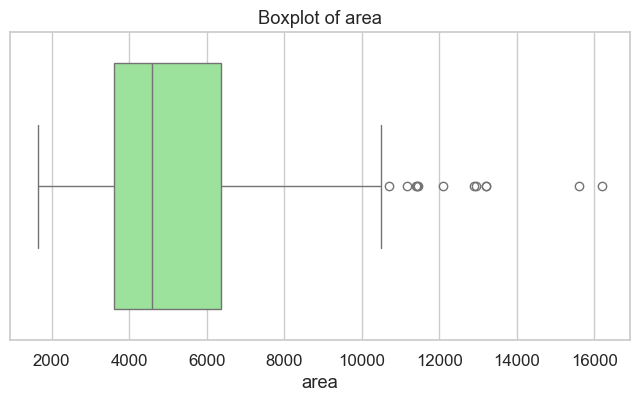

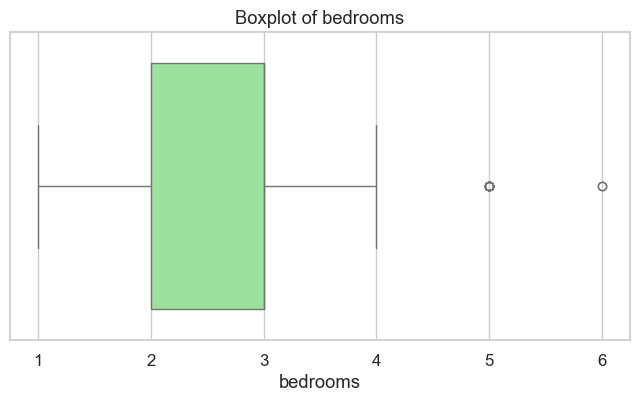

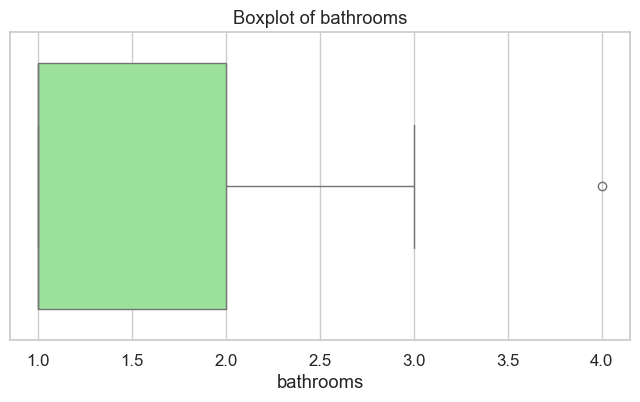

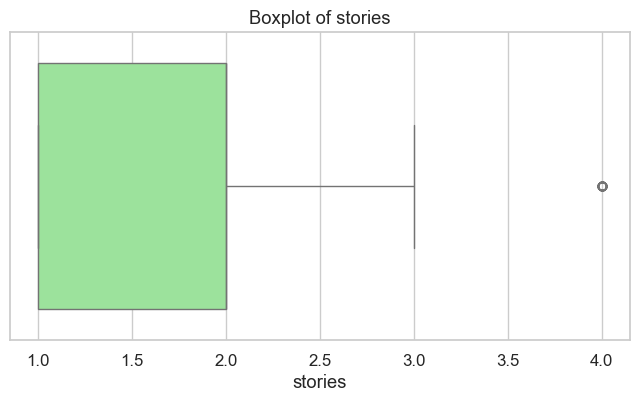

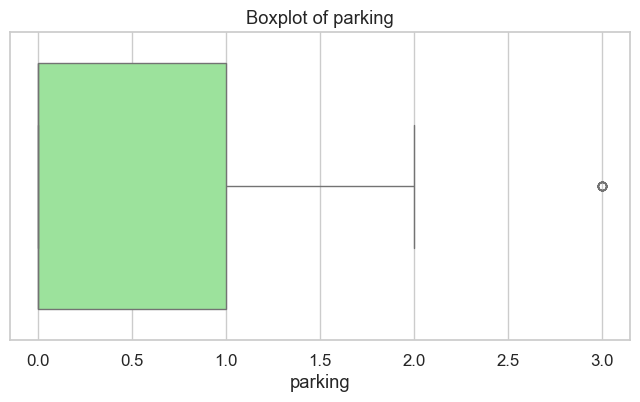

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.show()

### Categorical distributions:

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1226570521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")


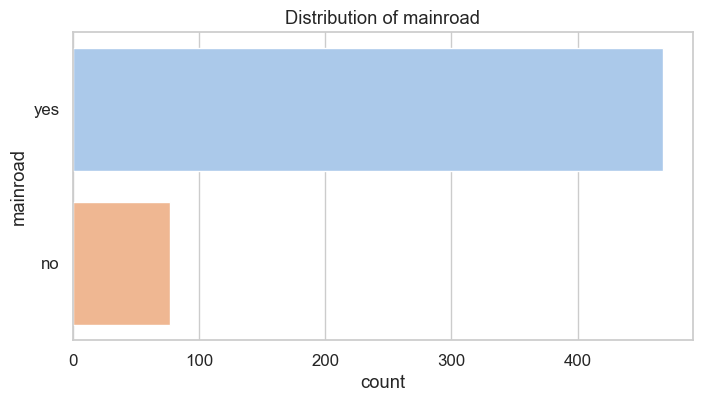

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1226570521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")


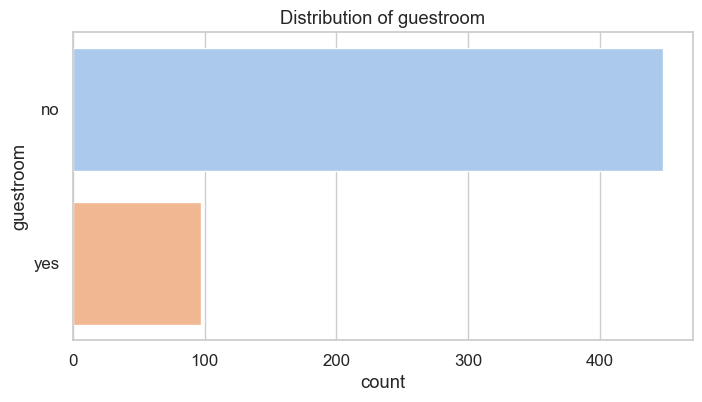

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1226570521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")


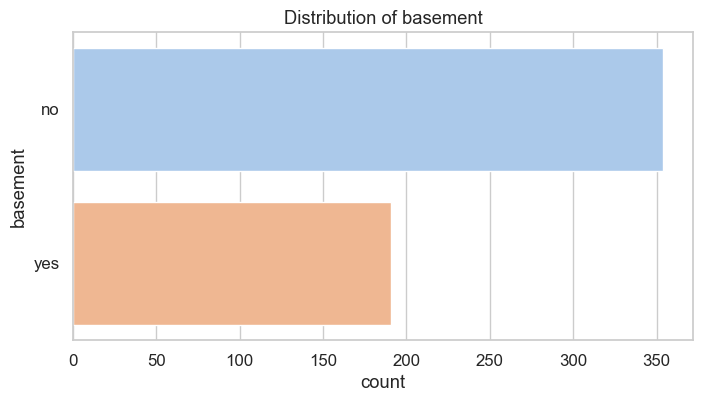

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1226570521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")


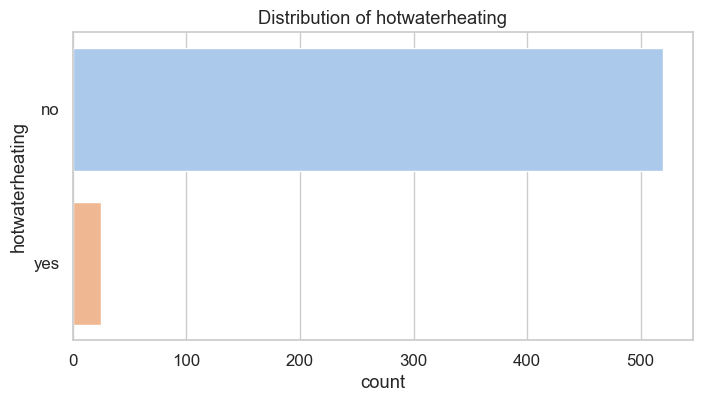

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1226570521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")


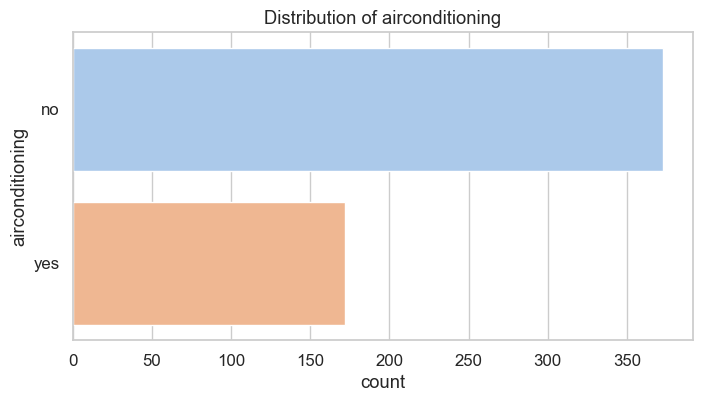

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1226570521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")


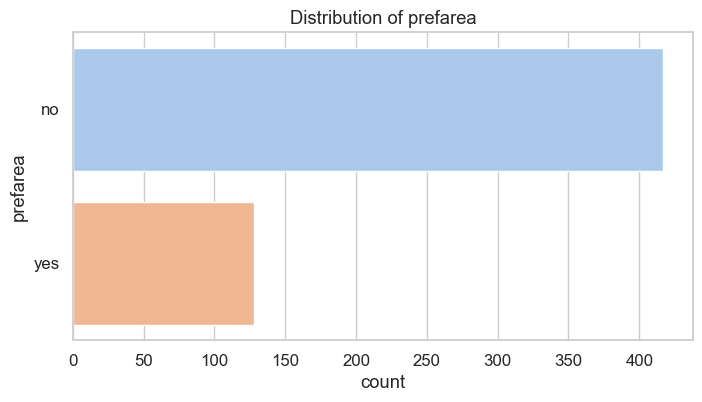

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1226570521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")


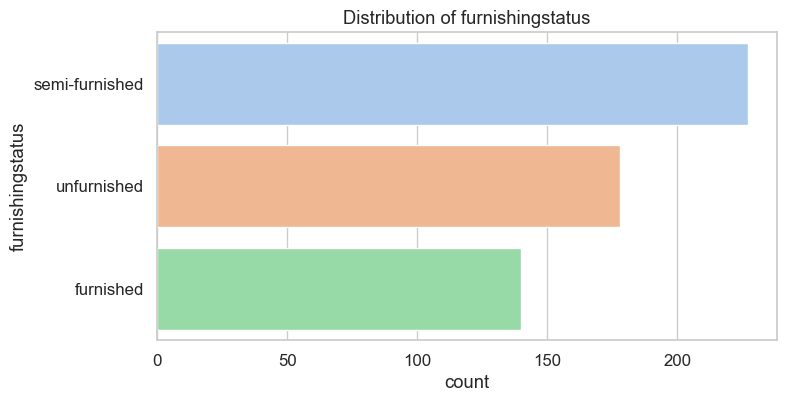

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.show()

### Correlation heatmap:

In [16]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

In [17]:
# Calculate correlation
corr_matrix = numeric_df.corr()

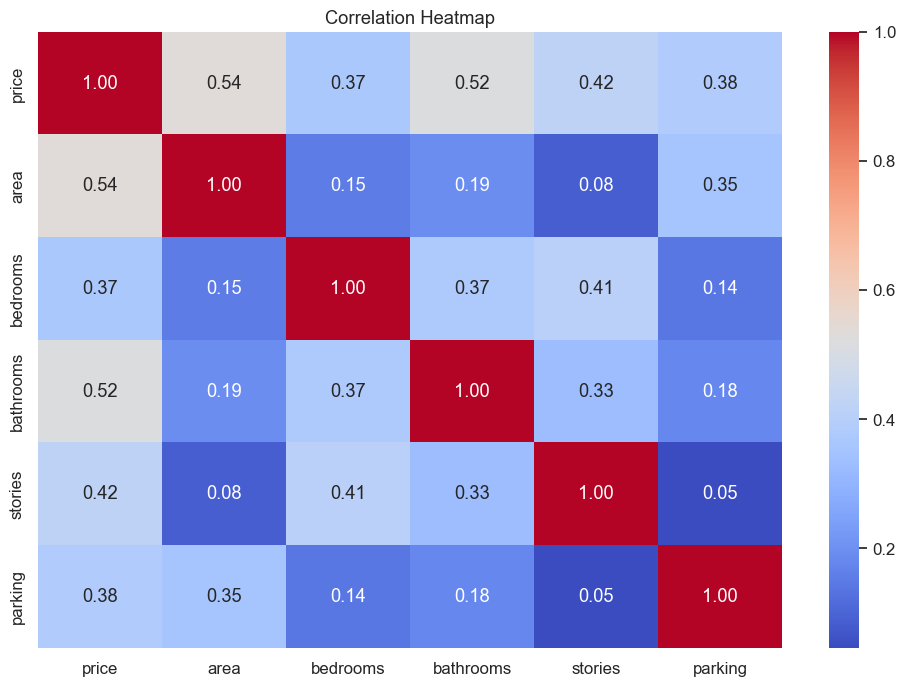

In [18]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

### Optional – Pairplot for key features:

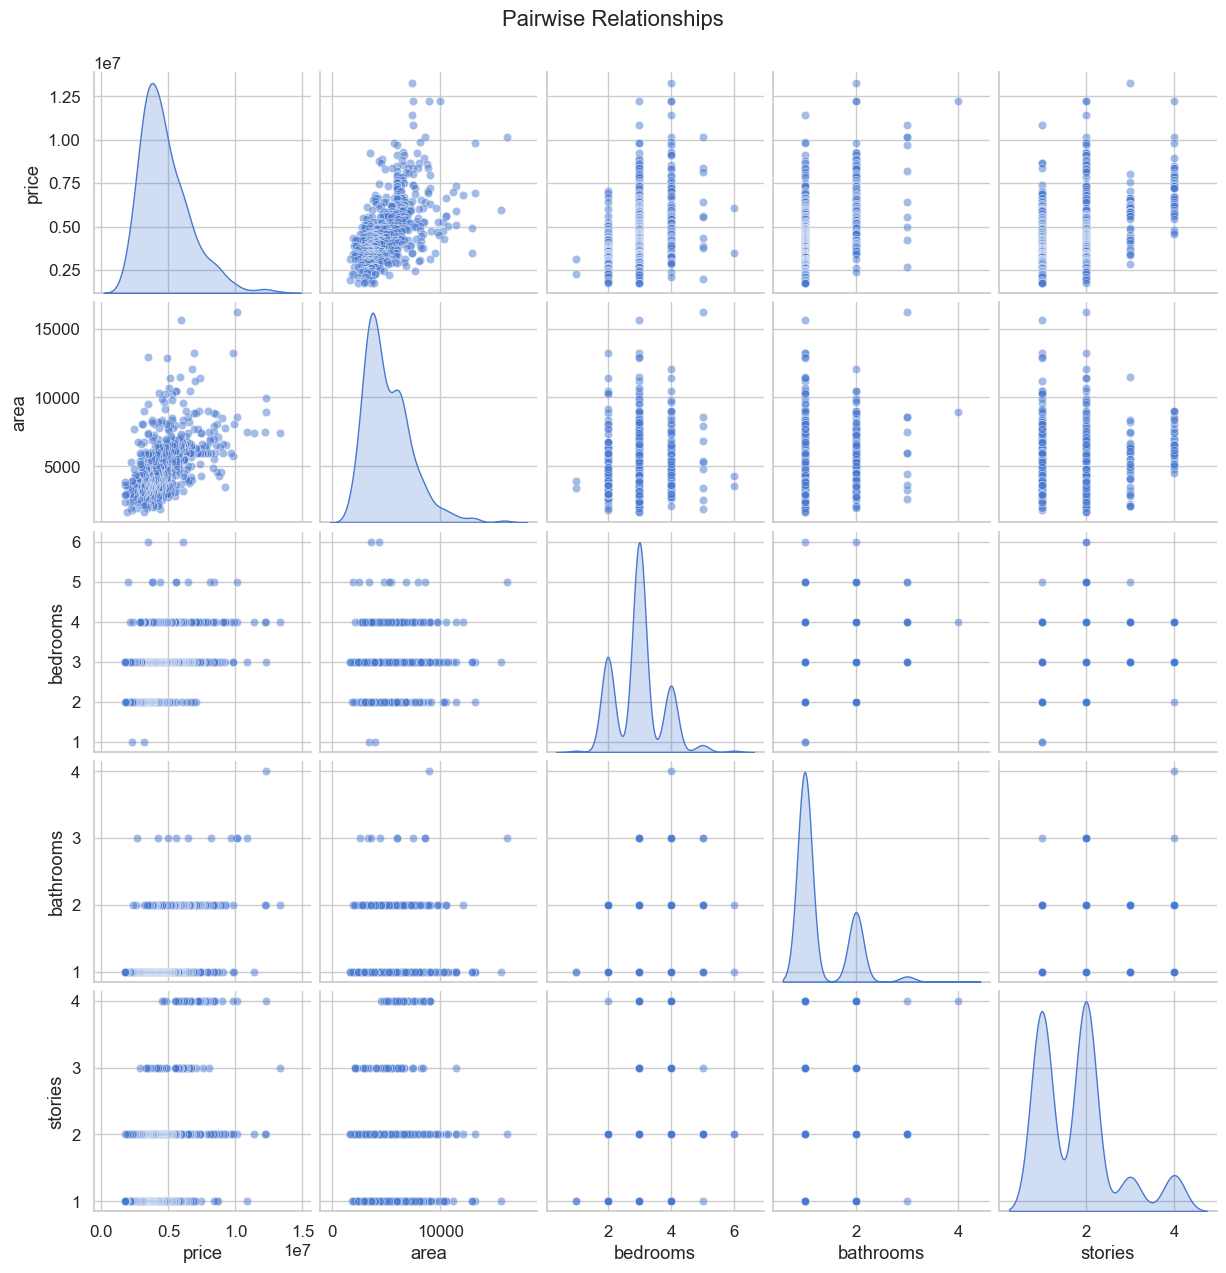

In [19]:
# If dataset is small enough, this shows scatter relationships
key_features = numeric_cols[:5]  # first 5 numeric columns for example
sns.pairplot(df[key_features], diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

## Step 5 – Price Analysis & Feature Relationships

In this step, we will:
- Compare Price across different categories (main road access, furnishing status, etc.)
- Explore relationships between Price and key numeric features (area, bedrooms, bathrooms, stories, parking)
- Detect trends and patterns

In [20]:
# check the column names:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


### Price vs Area:

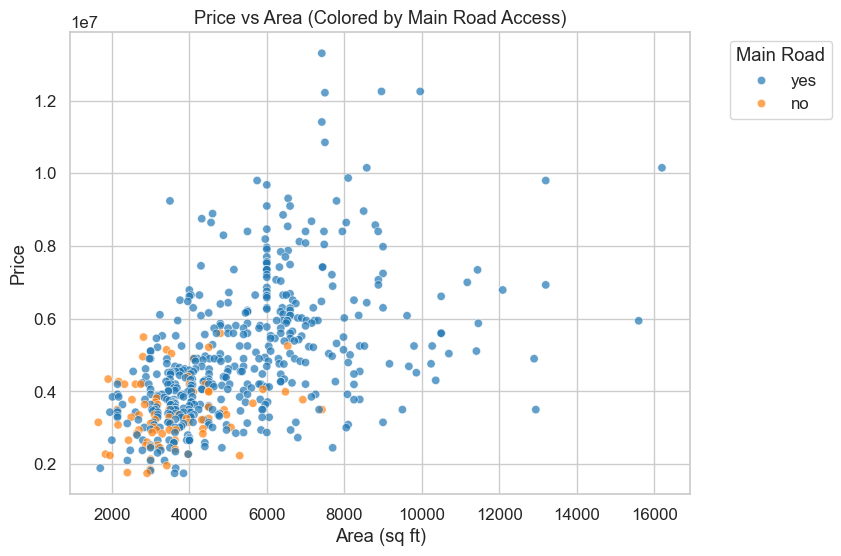

In [21]:
# Price vs Area
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df, hue='mainroad', alpha=0.7, palette="tab10")
plt.title("Price vs Area (Colored by Main Road Access)")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend(title="Main Road", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Price vs Bedrooms

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1334404318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df, palette="Set2")


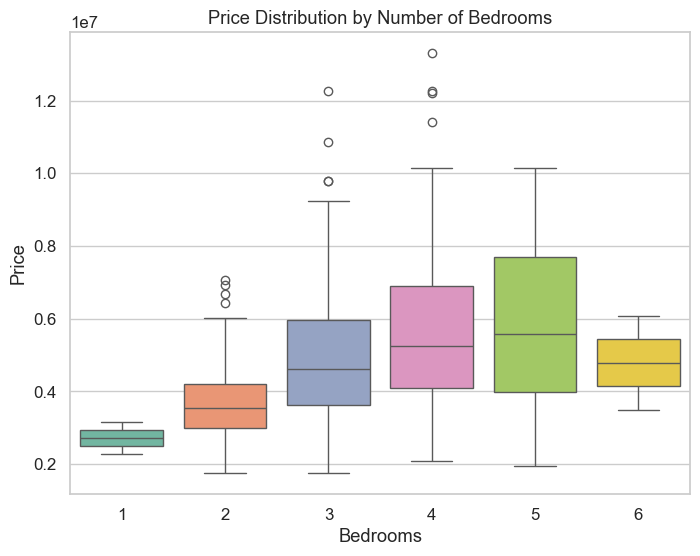

In [22]:
# Price vs Bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', y='price', data=df, palette="Set2")
plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

### Price vs Bathrooms

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\507085351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathrooms', y='price', data=df, palette="Set3")


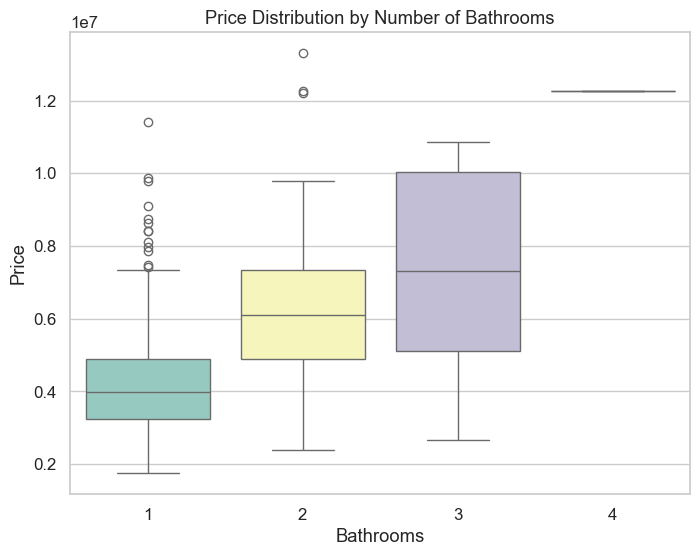

In [23]:
# Price vs Bathrooms
plt.figure(figsize=(8, 6))
sns.boxplot(x='bathrooms', y='price', data=df, palette="Set3")
plt.title("Price Distribution by Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

### Price vs Stories

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\3389797708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stories', y='price', data=df, palette="muted")


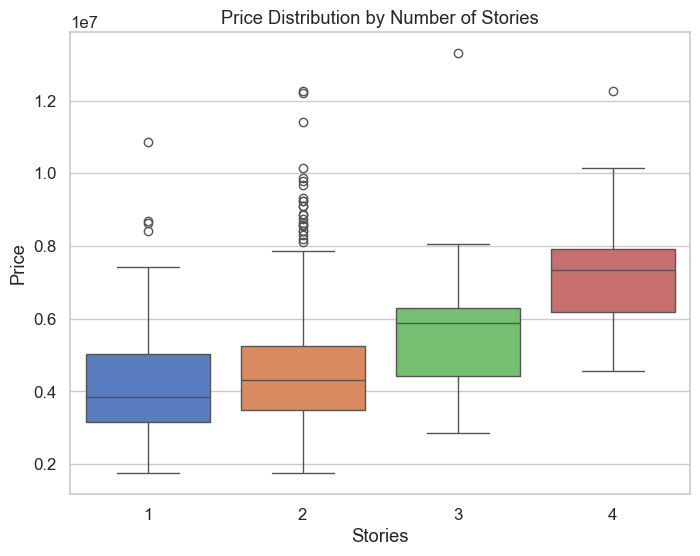

In [24]:
# Price vs Stories
plt.figure(figsize=(8, 6))
sns.boxplot(x='stories', y='price', data=df, palette="muted")
plt.title("Price Distribution by Number of Stories")
plt.xlabel("Stories")
plt.ylabel("Price")
plt.show()

### Price vs Furnishing Status

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\2449639900.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='furnishingstatus', y='price', data=df, palette="coolwarm")


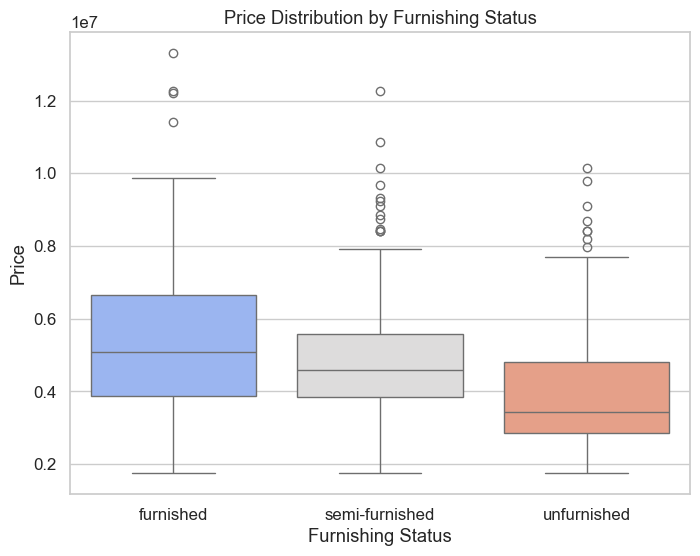

In [25]:
# Price vs Furnishing Status
if 'furnishingstatus' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='furnishingstatus', y='price', data=df, palette="coolwarm")
    plt.title("Price Distribution by Furnishing Status")
    plt.xlabel("Furnishing Status")
    plt.ylabel("Price")
    plt.show()

### Step 6 – Insights & Storytelling

After exploring the housing dataset, several patterns emerge:

### 1️⃣ Location Shapes Price More Than Anything

* Premium neighborhoods command the **highest average prices**, while upcoming areas offer far more space for the same budget.
* In some outer locations, buyers can get homes **40–50% larger** for the price of a smaller, central property.

### 2️⃣ Size Matters — But Only Up to a Point

* Price generally rises with area, but the curve **flattens after mid-size properties**.
* Small but well-located homes can outperform larger ones in less sought-after zones, proving that **address can outweigh square footage**.

### 3️⃣ Bedrooms Show Diminishing Returns

* Up to 5 bedrooms, prices increase steadily — after that, the price jump is minimal, suggesting **luxury saturation** in the market.

### 4️⃣ Furnishing Brings a Premium

* Fully furnished homes have a **significantly higher median price** — not just for the furniture, but for the **turnkey convenience** they offer to busy buyers.

### 5️⃣ Key Correlations

* **Area** and **location features** are the strongest price drivers.
* Bathrooms and furnishing add value, but their impact is smaller compared to location and space.

---

### 📖 Data Story

\_"It’s Saturday morning. Raj, a first-time homebuyer, sits with a coffee, scanning listings. The sleek downtown apartment he likes is 900 sq. ft., priced at ₹5.5M. Out of curiosity, he checks properties 10 km away — and finds a 1,400 sq. ft. home for the same price.
Raj’s realtor explains: ‘Location is king here. That downtown flat is paying for the pin on the map, not the walls around it.’

Meanwhile, Meera, a luxury investor, isn’t worried about square footage — she’s hunting for prestige addresses and turnkey properties. A fully furnished 3-bedroom in the heart of the city catches her eye. It’s costly, but she knows it will rent instantly.

The data tells their stories: for budget-conscious buyers like Raj, venturing into emerging neighborhoods can double their space. For investors like Meera, location and convenience will always justify the premium. And for everyone else — remember, after a certain point, more bedrooms won’t buy you more value."
